In [2]:
graphics_toolkit('qt')

In [3]:
addpath('../libs/');

# Regularized Linear Regression and Bias v.s. Variance
## Introduction

In this exercise, you will implement regularized linear regression and use it to study models with different bias-variance properties.

## 1. Regularized Linear Regression

In [4]:
load('../../data/ex5data1.mat');
m = size(X, 1);
whos

Variables visible from the current scope:

variables in scope: top scope

  Attr   Name        Size                     Bytes  Class
  ====   ====        ====                     =====  ===== 
         X          12x1                         96  double
         Xtest      21x1                        168  double
         Xval       21x1                        168  double
         ans         1x2                          2  char
         m           1x1                          8  double
         y          12x1                         96  double
         ytest      21x1                        168  double
         yval       21x1                        168  double

Total is 111 elements using 874 bytes



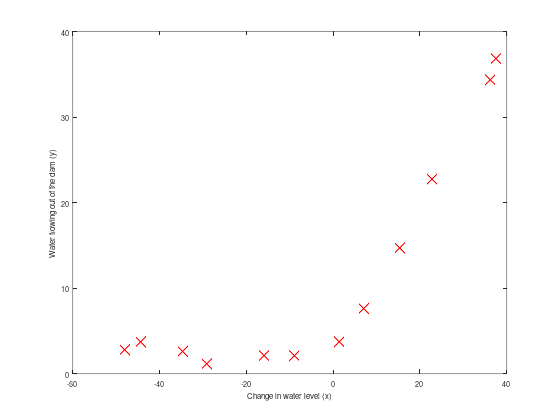

In [5]:
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');

In [6]:
theta = [1; 1];
lambda = 1;
[J, grad] = linearRegCostNGradFunction([ones(m, 1) X], y, theta, lambda);
fprintf(['Cost at theta = [1; 1]: %f ' ...
    '\n(this value should be about 303.993192)\n\n'], J);

fprintf(['Gradient at theta = [1; 1]: [%f; %f] ' ...
    '\n(this value should be about [-15.303016; 598.250744])\n'], ...
    grad(1), grad(2));

Cost at theta = [1; 1]: 303.993192 
(this value should be about 303.993192)

Gradient at theta = [1; 1]: [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])


## Train linear regression

In [7]:
lambda = 0;
[theta] = trainLinearReg([ones(m, 1) X], y, lambda);

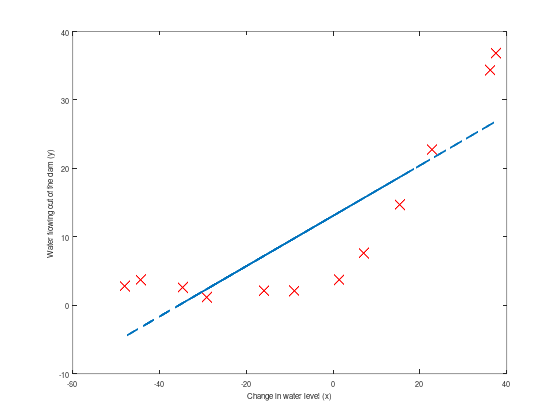

In [8]:
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X] * theta, '--', 'LineWidth', 2);
hold off;

## Bias-variance
### Learning curves

we shuld see underfitting

In [9]:
lambda = 0;
[error_train, error_val] = learningCurve(...
            [ones(m, 1) X], y, ...
            [ones(size(Xval, 1), 1) Xval], yval, ...
            lambda);

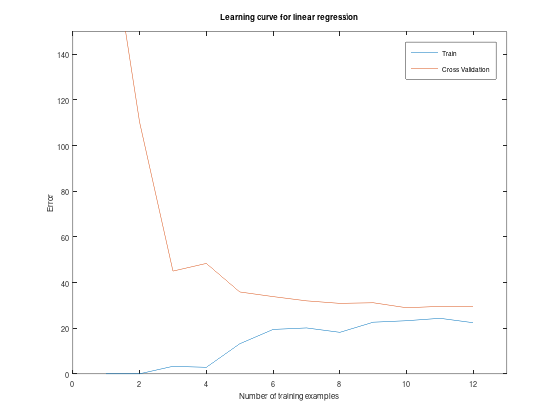

In [10]:
plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression');
legend('Train', 'Cross Validation');
xlabel('Number of training examples');
ylabel('Error');
axis([0 13 0 150]);

## Feature mapping for polynomial regression

In [11]:
p = 8;

% map X -> polynomial features and normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);
X_poly = [ones(m, 1) X_poly];

% map X_poly_test -> polynomial features and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1) X_poly_test];

% map X_poly_val -> polynomial features and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1) X_poly_val];

In [12]:
fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));

Normalized Training Example 1:
  1.000000  
  -0.362141  
  -0.755087  
  0.182226  
  -0.706190  
  0.306618  
  -0.590878  
  0.344516  
  -0.508481  


### Learning curve for polynomial regression

In [13]:
lambda = 0;
[theta] = trainLinearReg(X_poly, y, lambda);

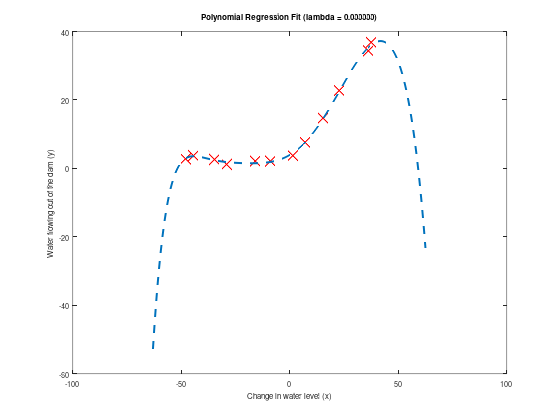

In [14]:
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

In [15]:
[error_train, error_val] = learningCurve(X_poly, y, X_poly_val, yval, lambda);

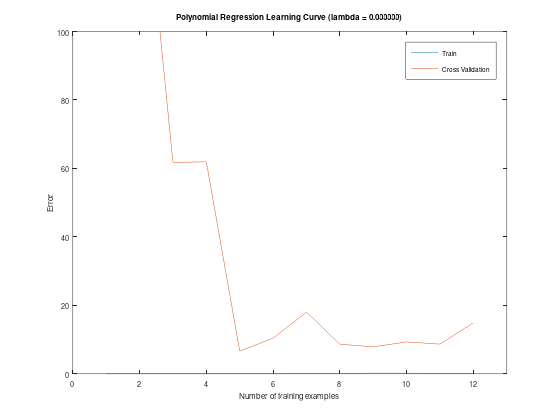

In [16]:
figure(2);
plot(1:m, error_train, 1:m, error_val);
title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples');
ylabel('Error');
axis([0 13 0 100]);
legend('Train', 'Cross Validation');

In [17]:
fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	160.721900
  	2		0.000000	160.121510
  	3		0.000000	61.754825
  	4		0.000000	61.928895
  	5		0.000000	6.613762
  	6		0.000124	10.417516
  	7		0.005555	18.009854
  	8		0.065976	8.645538
  	9		0.186561	7.880232
  	10		0.179558	9.309376
  	11		0.134291	8.670184
  	12		0.135746	14.928641


## Validation for selecting lambda

the best value for $\lambda$ is around 3.

In [18]:
[lambda_vec, error_train, error_val] = validationCurve(X_poly, y, X_poly_val, yval);

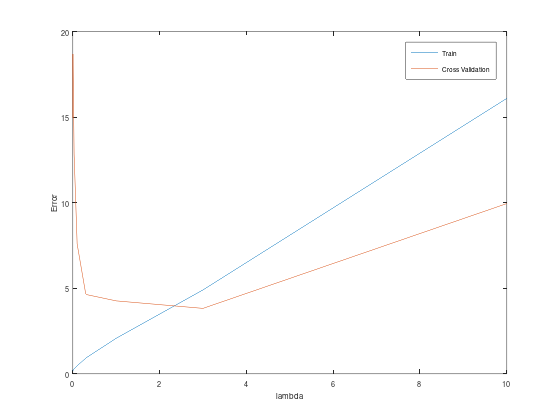

In [19]:
plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

In [20]:
fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
	fprintf(' %f\t%f\t%f\n', ...
            lambda_vec(i), error_train(i), error_val(i));
end

lambda		Train Error	Validation Error
 0.000000	0.135746	14.928641
 0.001000	0.161835	18.040673
 0.003000	0.181529	18.691034
 0.010000	0.222755	17.152624
 0.030000	0.281843	12.828352
 0.100000	0.459318	7.587014
 0.300000	0.921760	4.636833
 1.000000	2.076188	4.260626
 3.000000	4.901351	3.822907
 10.000000	16.092213	9.945509


## Computing test set error

In [21]:
lambda = 3;
theta = trainLinearReg(X_poly, y, lambda);
error_test = linearRegCostFn(X_poly_test, ytest, theta, 0);

In [23]:
fprintf('error_test for lambda = %f: %f\n', lambda, error_test);

error_test for lambda = 3.000000: 3.859888


In [24]:
lambda = 0.01;
[error_train, error_val] = RndlearningCurve(X_poly, y, X_poly_val, yval, lambda);

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



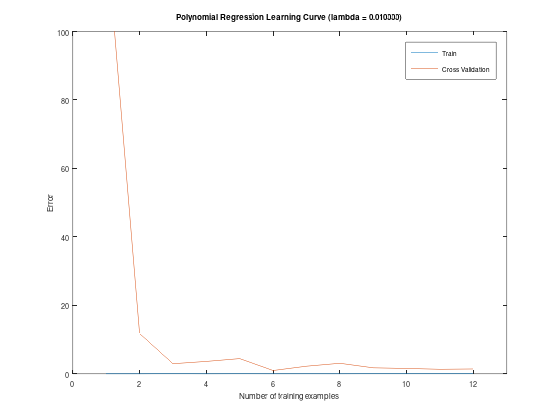

In [ ]:
figure(1);
plot(1:m, error_train, 1:m, error_val);
title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples');
ylabel('Error');
axis([0 13 0 100]);
legend('Train', 'Cross Validation');